In [21]:
from shapely.geometry import Polygon, Point, MultiPolygon
from shapely import intersection, intersection_all, difference, union_all, union
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as PlotPolygon
from matplotlib.patches import Rectangle
from random import random, randrange
from math import comb




### Define create functions

In [2]:
## Make circle function as polygon
def Circle(x, y, radius):
    return Point(x,y).buffer(radius)


### Define process function

### Visualise Function

In [192]:
def randomColor():
    r = random()
    g = random()
    b = random()
    return (r,g,b)

def visualiseScene(polygons = [], points = [], table = False):
    colors = []
    fig, ax = plt.subplots(figsize = (9,6))
    ax.set_xlim([-3, 3])
    ax.set_ylim([-2, 2])
    ax.set_title('Shapely Polygons Visualization')

    # Draw polygons
    for polygon in polygons:
        if not polygon.is_empty:
        # color
            ax.add_patch(PlotPolygon(xy=polygon.exterior.coords, edgecolor='black', facecolor=randomColor(), alpha = 0.5))
        
        # grey
        # ax.add_patch(PlotPolygon(xy=polygon.exterior.coords, edgecolor='black', facecolor='black', alpha = 0.1))
    
    
    # Draw Rectangle (Table)
    if table:
        ax.add_patch(PlotPolygon(xy=Polygon(((-1,-0.5),(-1, 0.5),(1, 0.5),(1,-0.5))).exterior.coords, edgecolor='black', facecolor='white', alpha = 1))
    
    # Draw points
    for point in points:
        plt.scatter(point[0],point[1], color ="black")      
        

    plt.show()

### Load in intial test scene data

In [4]:
class Plate:
    def __init__(self, x=0, y=0, radius=1):
        self.x = x
        self.y = y
        self.radius = radius
        self.center = (x,y)
        self.polygon = Circle(x,y,radius)

def CreatePlateScene(coords): # coords is list of (x,y) of plate, e.g. [(1,2),(2,4),(5,1)]
    plates = []
    for plate in coords:
        plates.append(Plate(plate[0],plate[1],1))

    return plates

plate_coords = [    
        (0.69136,-0.03378),
        (0.46042,-0.31386),
        (0.23854,0.22787),
        (-0.07518,-0.28684),
        (-0.20048,0.13328),
        (0.63731,0.25367),
        (0.21473,0.04484),
        (-0.69118,-0.27422),
        (-0.824,0.26879),
        (-0.39502,-0.31306),
        (-0.5668,0.13019)
        ]

plates = CreatePlateScene(plate_coords)

# for plate in plates:
#     print (f"x = {plate.x}")
#     print (f"y = {plate.y}")
#     print (f"center = {plate.center}")
#     print()  

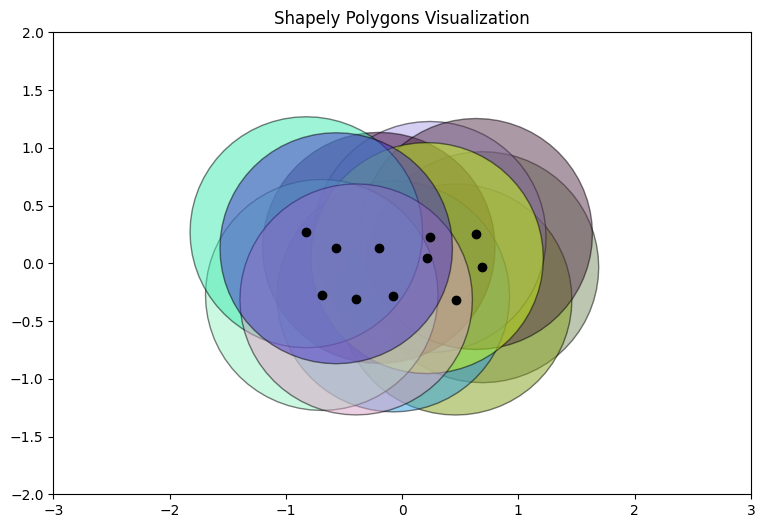

In [193]:
poly_list = [plate.polygon for plate in plates]
centers_list = [plate.center for plate in plates]
visualiseScene(poly_list, centers_list)

In [6]:
## Function to return intersected region and non-intersected region separately
def IntersectionAllRegions(poly1: Polygon, poly2: Polygon):

    intersection_1 = poly1.intersection(poly2)
    difference_1 = poly1.difference(intersection_1)
    difference_2 = poly2.difference(intersection_1)
    return intersection_1, difference_1, difference_2

a,b,c = IntersectionAllRegions(poly_list[0], poly_list[1])

# visualiseScene([a,b,c])

In [181]:
def getIntersectRegions(polygons): ## polygons is the list of all polygon

    return_list = []


    for iteration in range(len(polygons)):

        temp_return_list = return_list

        for i in range(comb(len(polygons),iteration)):

                end = i+len(polygons)-iteration
                if end > len(polygons):
                    temp = intersection_all(polygons[i:] + polygons[:end-len(polygons)])
                    
                else:
                    temp = intersection_all(polygons[i:end])

                return_list.append(difference(temp, union_all(temp_return_list, grid_size = 0.005), grid_size = 0.005))
    
    return return_list

        

In [203]:
x = getIntersectRegions(poly_list[0:4])
poly_list[0:3]
x

[<POLYGON ((-0.19 -0.505, -0.235 -0.415, -0.265 -0.325, -0.29 -0.23, -0.305 -...>,
 <POLYGON ((0.265 0.665, 0.36 0.68, 0.46 0.685, 0.56 0.68, 0.655 0.665, 0.75 ...>,
 <POLYGON ((-0.52 -0.12, -0.495 -0.025, -0.465 0.07, -0.42 0.16, -0.37 0.24, ...>,
 <POLYGON ((-0.14 0.52, -0.08 0.6, -0.015 0.675, 0.025 0.71, 0.12 0.695, 0.21...>,
 <POLYGON ((0.88 -0.575, 0.85 -0.67, 0.805 -0.76, 0.755 -0.84, 0.7 -0.92, 0.6...>,
 <POLYGON ((1.245 -0.865, 1.165 -0.915, 1.075 -0.96, 0.98 -0.99, 0.885 -1.015...>,
 <POLYGON EMPTY>,
 <POLYGON ((-0.595 -0.33, -0.645 -0.245, -0.685 -0.155, -0.72 -0.06, -0.74 0....>,
 <POLYGON EMPTY>,
 <POLYGON EMPTY>,
 <POLYGON EMPTY>,
 <POLYGON ((1.685 -0.13, 1.67 -0.23, 1.65 -0.325, 1.615 -0.415, 1.575 -0.505,...>,
 <POLYGON ((1.29 -0.87, 1.235 -0.95, 1.17 -1.02, 1.095 -1.085, 1.015 -1.145, ...>,
 <POLYGON ((-0.72 0.52, -0.685 0.61, -0.645 0.7, -0.595 0.785, -0.535 0.86, -...>,
 <POLYGON ((0.12 -1.27, 0.025 -1.28, -0.075 -1.285, -0.175 -1.28, -0.27 -1.27...>]

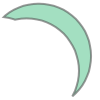

In [216]:
x[11]


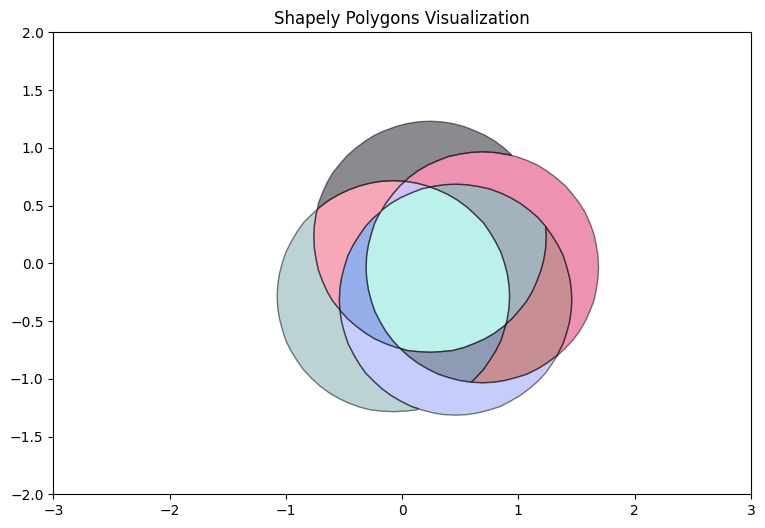

In [201]:
visualiseScene(x)

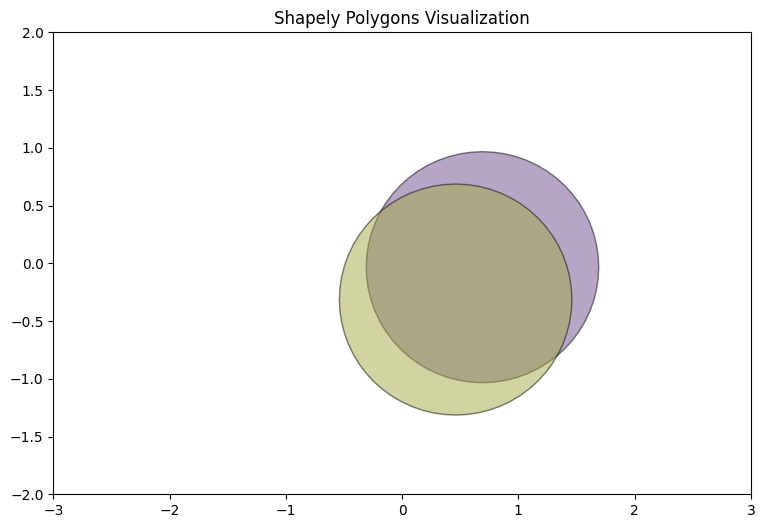

In [110]:
visualiseScene(poly_list[:2])    

In [149]:
hi = [1,2,3,4,5]
hi[3:]+hi[:-2]

[4, 5, 1, 2, 3]